In [1]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install  category_encoders

  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



In [4]:
pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)



In [1]:
#importing library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import plotly.express as px



# Libraries for Data Preprocessing
import glob
from numpy import sort
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
from xgboost import plot_importance, to_graphviz
from sklearn.model_selection import StratifiedKFold


# Importing ML Model packages
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification


# Libraries for measuring accuracy
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text



import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree

import requests
import io


In [2]:
#import pandas as pd
df = pd.read_csv("C:/Users/b1666681/OneDrive - Teesside University/Dissertation/Data/Base.csv")

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [4]:
# Rename the 'Class' column to 'Status'
df = df.rename(columns={'fraud_bool': 'Fraud_Status'})

In [5]:
#Data preview
df.head()

,Fraud_Status,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [6]:
df.shape

(1000000, 32)

In [6]:
# Calculate summary statistics for each feature in the dataset
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

         Fraud_Status          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.0

In [6]:
df['Fraud_Status'].value_counts()

0    988971
1     11029
Name: Fraud_Status, dtype: int64

# Checking for missing values

In [5]:
df.isna().sum()

Fraud_Status                        0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

# Exploratory Data Analysis

Analysing the data to get insight about the data and to find patterns

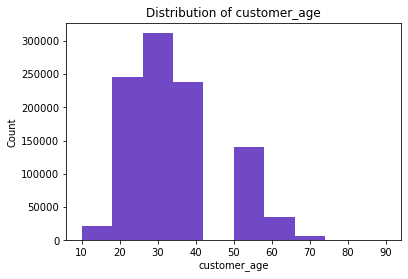

In [9]:
# Visualize the distribution of the 'customer_age' feature using a histogram
plt.hist(df['customer_age'], bins=10, color='#7149C6')
plt.xlabel('customer_age')
plt.ylabel('Count')
plt.title('Distribution of customer_age')
# Removing gridlines
plt.grid(False)
plt.show()

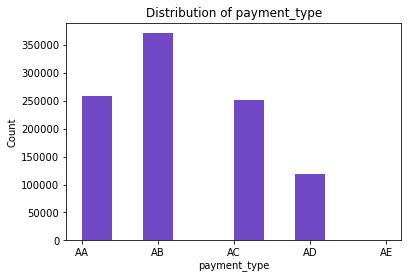

In [10]:
# Visualize the distribution of the 'payment_type' feature using a histogram
plt.hist(df['payment_type'], bins=10, color='#7149C6')
plt.xlabel('payment_type')
plt.ylabel('Count')
plt.title('Distribution of payment_type')
# Removing gridlines
plt.grid(False)
plt.show()

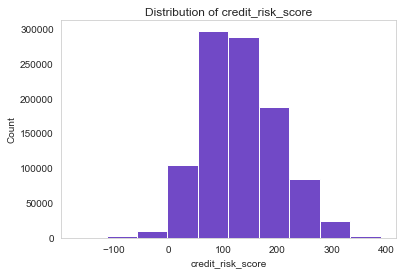

In [181]:
# Visualize the distribution of the 'credit_risk_score' feature using a histogram
plt.hist(df['credit_risk_score'], bins=10, color='#7149C6')
plt.xlabel('credit_risk_score')
plt.ylabel('Count')
plt.title('Distribution of credit_risk_score')
# Removing gridlines
plt.grid(False)
plt.show()

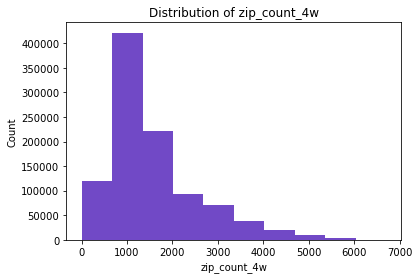

In [7]:
# Visualize the distribution of the 'zip_count_4w' feature using a histogram
plt.hist(df['zip_count_4w'], bins=10, color='#7149C6')
plt.xlabel('zip_count_4w')
plt.ylabel('Count')
plt.title('Distribution of zip_count_4w')
# Removing gridlines
plt.grid(False)
plt.show()

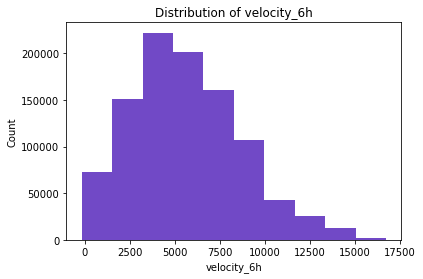

In [52]:
# Visualize the distribution of the 'velocity_6h' feature using a histogram
plt.hist(df['velocity_6h'], bins=10, color='#7149C6')
plt.xlabel('velocity_6h')
plt.ylabel('Count')
plt.title('Distribution of velocity_6h')
plt.show()

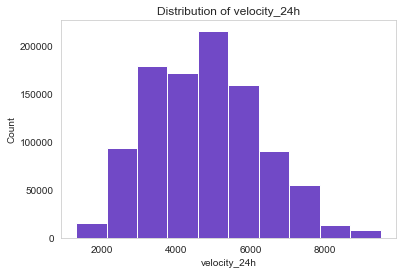

In [184]:
# Visualize the distribution of the 'velocity_24h' feature using a histogram 4E6E81,7149C6
plt.hist(df['velocity_24h'], bins=10, color='#7149C6')
plt.xlabel('velocity_24h')
plt.ylabel('Count')
plt.title('Distribution of velocity_24h')
# Removing gridlines
plt.grid(False)
plt.show()

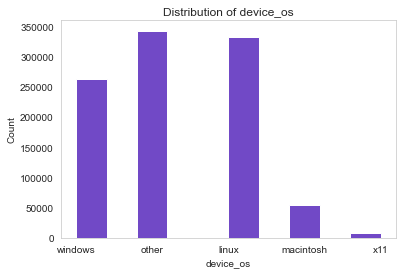

In [185]:
# Visualize the distribution of the 'device_os' feature using a histogram
plt.hist(df['device_os'], bins=10, color='#7149C6')
plt.xlabel('device_os')
plt.ylabel('Count')
plt.title('Distribution of device_os')
# Removing gridlines
plt.grid(False)
plt.show()

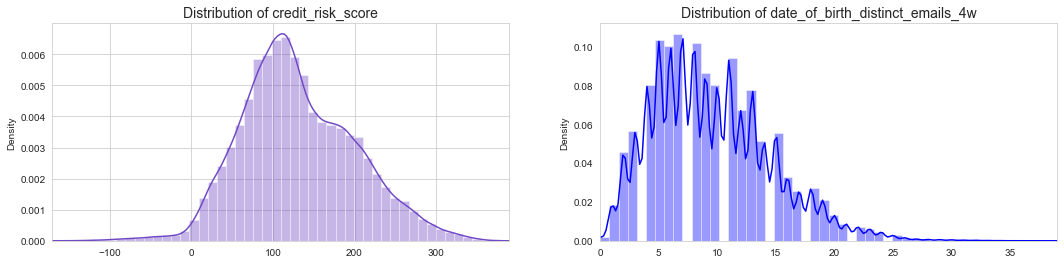

In [186]:
fig, ax = plt.subplots(1, 2,  figsize=(18,4))

credit_limit_val = df['credit_risk_score'].values
date_of_birth_distinct_emails_4w = df['date_of_birth_distinct_emails_4w'].values

sns.distplot(credit_limit_val, ax=ax[0], color='#7149C6')  # Update color to 'red'
ax[0].set_title('Distribution of credit_risk_score', fontsize=14)
ax[0].set_xlim([min(credit_limit_val), max(credit_limit_val)])

sns.distplot(income_val, ax=ax[1], color='blue')  # Update color to 'blue'
ax[1].set_title('Distribution of date_of_birth_distinct_emails_4w', fontsize=14)
ax[1].set_xlim([min(date_of_birth_distinct_emails_4w), max(date_of_birth_distinct_emails_4w)])

# Removing gridlines
plt.grid(False)
plt.show()


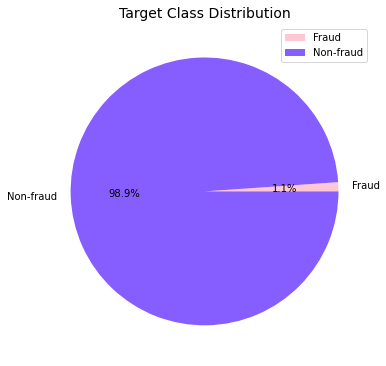

In [9]:
# Calculate the total number of fraud cases and non-fraud cases FFC6D3,7B8FA1
total_fraud = df[df['Fraud_Status'] == 1]['Fraud_Status'].count()
total_non_fraud = df[df['Fraud_Status'] == 0]['Fraud_Status'].count()

# Create a list of labels for the pie chart
labels = ['Fraud', 'Non-fraud']

# Create a list of sizes for each slice of the pie chart
sizes = [total_fraud, total_non_fraud]
# Define custom colors for the pie chart
colors = ['#FFC6D3', '#865DFF']  # Set colors here

# Create a pie chart with the labels and sizes
plt.figure(figsize=(6, 7))  # Resize the chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors)

# Add a title to the pie chart
plt.title('Target Class Distribution',fontsize=14)

# Add a legend to the pie chart
plt.legend(labels, loc='best')

# Display the pie chart
plt.show()


# Handling Outliers

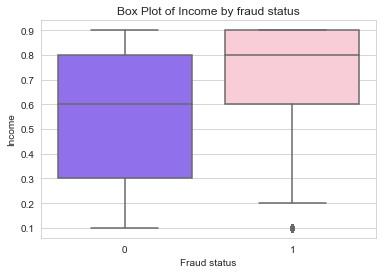

In [6]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'income' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='income', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud status')
plt.ylabel('Income')
plt.title('Box Plot of Income by fraud status')

# Display the plot
plt.show()

In [7]:
# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 1) & (df["income"] < 0.2)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 909


In [8]:
# Replace values in the 'income' column with mean value of 0.56 where 'Fraud_Status' is equal to 1 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 1) & (df["income"] < 0.2), 'income'] = 0.56

In [9]:
df[(df["Fraud_Status"] == 1) & (df["income"] < 0.2)]

,Fraud_Status,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


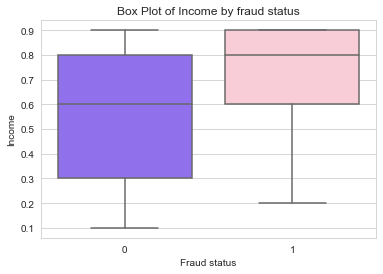

In [10]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'Income' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='income', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud status')
plt.ylabel('Income')
plt.title('Box Plot of Income by fraud status')

# Display the plot
plt.show()

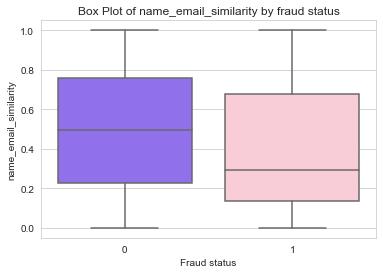

In [11]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'name_email_similarity' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='name_email_similarity', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud status')
plt.ylabel('name_email_similarity')
plt.title('Box Plot of name_email_similarity by fraud status')

# Display the plot
plt.show()

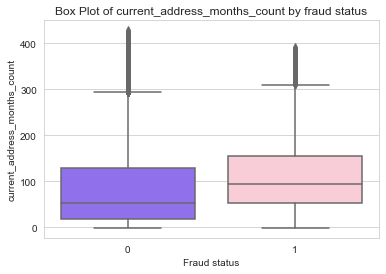

In [12]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'current_address_months_count' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='current_address_months_count', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud status')
plt.ylabel('current_address_months_count')
plt.title('Box Plot of current_address_months_count by fraud status')

# Display the plot
plt.show()

In [13]:
# search for instances outside of the whiskers 
out_income= df[(df["Fraud_Status"] == 1) & (df["current_address_months_count"] > 230)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 1170


In [14]:
# search for instances outside of the whiskers 
out_income= df[(df["Fraud_Status"] == 0) & (df["current_address_months_count"] > 120)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 267593


In [15]:
# Replace values in the 'current_address_months_count' column with mean value of 86.6 where 'Fraud_Status' is equal to 1 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 1) & (df["current_address_months_count"] > 230), 'current_address_months_count'] = 86.6

# Replace values in the 'current_address_months_count' column with mean value of 86.6 where 'Fraud_Status' is equal to 0 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 0) & (df["current_address_months_count"] > 120), 'current_address_months_count'] = 86.6

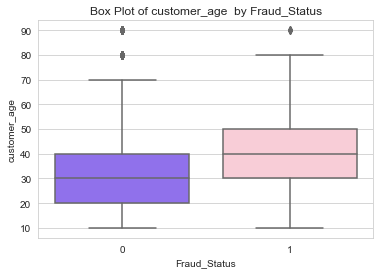

In [16]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'customer_age' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='customer_age', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud_Status')
plt.ylabel('customer_age')
plt.title('Box Plot of customer_age  by Fraud_Status')

# Display the plot
plt.show()

In [17]:
# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 0) & (df["customer_age"] > 70)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 1) & (df["customer_age"] > 70)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 1305
Number of selected rows: 68


In [18]:
# Replace values in the 'customer_age' column with mean value of 33.6 where 'Fraud_Status' is equal to 1 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 1) & (df["customer_age"] > 70), 'customer_age'] = 33.6

# Replace values in the 'customer_age' column with mean value of 33.6 where 'Fraud_Status' is equal to 0 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 0) & (df["customer_age"] > 70), 'customer_age'] = 33.6

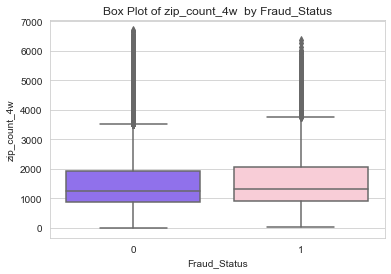

In [19]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'zip_count_4w' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='zip_count_4w', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud_Status')
plt.ylabel('zip_count_4w')
plt.title('Box Plot of zip_count_4w  by Fraud_Status')

# Display the plot
plt.show()

In [20]:
# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 0) & (df["zip_count_4w"] > 2400)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 1) & (df["zip_count_4w"] > 2500)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 178869
Number of selected rows: 2007


In [21]:
# Replace values in the 'zip_count_4w' column with mean value of 1572.7 where 'Fraud_Status' is equal to 1 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 1) & (df["zip_count_4w"] > 2500), 'zip_count_4w'] = 1572.7

# Replace values in the 'zip_count_4w' column with mean value of 1572.7 where 'Fraud_Status' is equal to 0 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 0) & (df["zip_count_4w"] > 2400), 'zip_count_4w'] = 1572.7

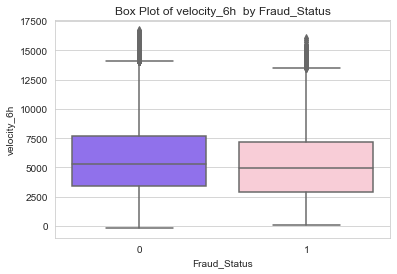

In [22]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'velocity_6h' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='velocity_6h', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud_Status')
plt.ylabel('velocity_6h')
plt.title('Box Plot of velocity_6h  by Fraud_Status')

# Display the plot
plt.show()

In [23]:
# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 0) & (df["velocity_6h"] > 13700) ]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 1) & (df["velocity_6h"] > 13000)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 11967
Number of selected rows: 154


In [24]:
# Replace values in the 'velocity_6h' column with mean value of 5665 where 'Fraud_Status' is equal to 1 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 1) & (df["velocity_6h"] > 13000) , 'velocity_6h'] = 5665

# Replace values in the 'velocity_6h' column with mean value of 5665 where 'Fraud_Status' is equal to 0 and 'income' is less than 0.2
df.loc[(df["Fraud_Status"] == 0) & (df["velocity_6h"] > 13700) , 'velocity_6h'] = 5665



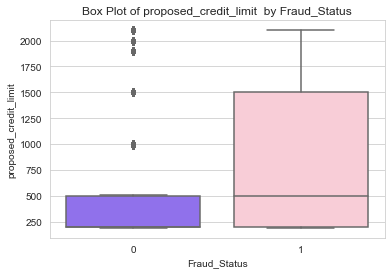

In [25]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'proposed_credit_limit' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='proposed_credit_limit', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud_Status')
plt.ylabel('proposed_credit_limit')
plt.title('Box Plot of proposed_credit_limit  by Fraud_Status')

# Display the plot
plt.show()

In [26]:
# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 0) & (df["proposed_credit_limit"] > 500)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)



Number of selected rows: 243576


In [27]:
# Replace values in the 'proposed_credit_limit' column with mean value of 515.8 where 'Fraud_Status' is equal to 0 and 'proposed_credit_limit' is greater than 500
df.loc[(df["Fraud_Status"] == 0) & (df["proposed_credit_limit"] > 500), 'proposed_credit_limit'] = 515.8

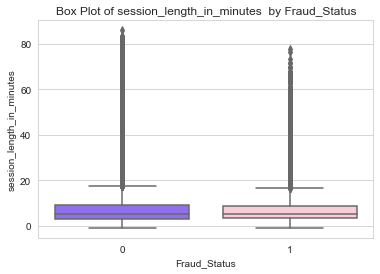

In [28]:
colors = ['#865DFF', '#FFC6D3']
# Create a box plot of 'session_length_in_minutes' for each 'Class'
sns.set_style('whitegrid')
sns.set_palette(colors)  # Pass colors to palette parameter
sns.boxplot(x='Fraud_Status', y='session_length_in_minutes', data=df)

# Add labels and a title to the plot
plt.xlabel('Fraud_Status')
plt.ylabel('session_length_in_minutes')
plt.title('Box Plot of session_length_in_minutes  by Fraud_Status')

# Display the plot
plt.show()

In [29]:
# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 0) & (df["session_length_in_minutes"] > 14)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

# search for instances outside of the whiskers n
out_income= df[(df["Fraud_Status"] == 1) & (df["session_length_in_minutes"] > 14)]
# Count the number of selected rows
num_rows = len(out_income)

# Display the number of selected rows
print("Number of selected rows:", num_rows)

Number of selected rows: 119300
Number of selected rows: 1479


In [30]:
# Replace values in the 'session_length_in_minutes' column with mean value of 7.5 where 'Fraud_Status' is equal to 1 and 'session_length_in_minutes' is less than 14
df.loc[(df["Fraud_Status"] == 1) & (df["session_length_in_minutes"] > 14), 'session_length_in_minutes'] = 7.5

# Replace values in the 'session_length_in_minutes' column with mean value of 7.5 where 'Fraud_Status' is equal to 0 and 'session_length_in_minutes' is less than 14
df.loc[(df["Fraud_Status"] == 0) & (df["session_length_in_minutes"] > 14), 'session_length_in_minutes'] = 7.5

# Payment Mode for Fraud transactions

In [31]:
Fraud_trans = df.loc[df['Fraud_Status'] == 1].source.drop_duplicates().values
print('\nTypes of payment method used for Fraud transactions are',Fraud_trans) 


Types of payment method used for Fraud transactions are ['INTERNET' 'TELEAPP']


# Analysis the fraudulent transactions 

In [243]:
total_fradulent = len(df.loc[(df.Fraud_Status == 1)])
print('\nTotal number of Fradulent Transaction are: ',total_fradulent) #8213

INTERNET= (df.loc[(df.Fraud_Status == 1)&(df.source == 'INTERNET')]) 

print('\nNumber of Fradulent Transaction via INTERNET: ',len(INTERNET))  #4097

TELEAPP = (df.loc[(df.Fraud_Status == 1)&(df.source == 'TELEAPP')])
print('\nNumber of Fradulent Transaction via TELEAPP: ', len(TELEAPP))  #4116


Total number of Fradulent Transaction are:  11029

Number of Fradulent Transaction via INTERNET:  10917

Number of Fradulent Transaction via TELEAPP:  112


There are 11029 fraudulent transactions, with INTERNET payment method accounting for 10917 and TELEAPP 112

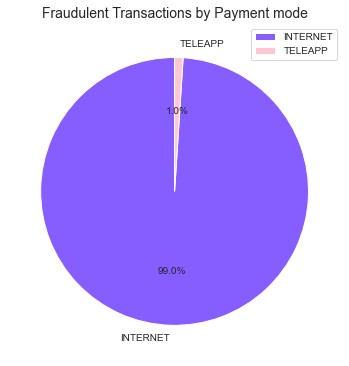

In [31]:
#import matplotlib.pyplot as plt

# Count of fraudulent transactions via INTERNET and TELEAPP
INTERNET = df.loc[(df.Fraud_Status == 1) & (df.source == 'INTERNET')]
TELEAPP = df.loc[(df.Fraud_Status == 1) & (df.source == 'TELEAPP')]

# Data for the pie chart
labels = ['INTERNET', 'TELEAPP']
sizes = [len(INTERNET), len(TELEAPP)]
#colors = ['#FFC6D3', '#865DFF']  # Set colors here
colors = ['#865DFF', '#FFC6D3']  # Set colors here

# Create a pie chart
plt.figure(figsize=(6, 7))  # Resize the chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Fraudulent Transactions by Payment mode',fontsize=14)
# Add a legend to the pie chart
plt.legend(labels, loc='best')
plt.show()


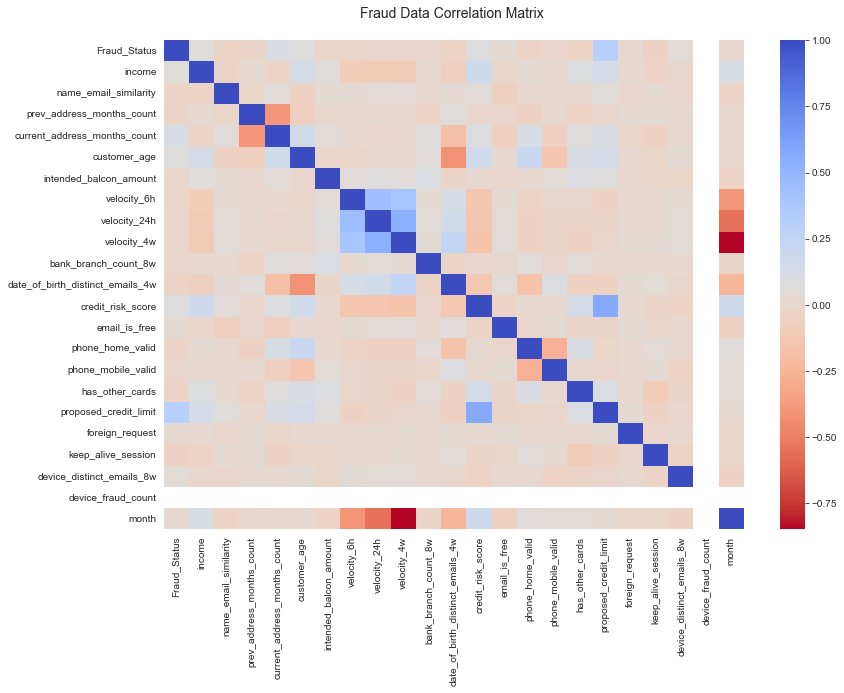

In [33]:
#f = plt.subplots(2, 1, figsize=(24,20))

# Set the color map
cmap = 'coolwarm_r'  # Change color map here
# Entire DataFrame
corr = df.corr()
fig = plt.figure(figsize=(13,9))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':25})
plt.title("Fraud Data Correlation Matrix \n ", fontsize=14)
# Display the plot
plt.show()

# Feature Selection

In [35]:
#Correlation with output variable
correlation=df.corr()
cor_target = abs(correlation["Fraud_Status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target < 1]
relevant_features.sort_values(ascending=False)

proposed_credit_limit               0.310867
current_address_months_count        0.117891
credit_risk_score                   0.070624
customer_age                        0.061629
income                              0.058785
keep_alive_session                  0.050296
date_of_birth_distinct_emails_4w    0.043224
name_email_similarity               0.036720
device_distinct_emails_8w           0.035704
has_other_cards                     0.035156
phone_home_valid                    0.035128
email_is_free                       0.027758
prev_address_months_count           0.026031
intended_balcon_amount              0.024524
velocity_6h                         0.018218
foreign_request                     0.016885
month                               0.013250
phone_mobile_valid                  0.013180
bank_branch_count_8w                0.011577
velocity_4w                         0.011536
velocity_24h                        0.011183
zip_count_4w                        0.009539
bank_month

In [31]:
# Drop the unwanted features columns from the dataframe
df = df.drop(['days_since_request', 'session_length_in_minutes','bank_months_count','zip_count_4w'], axis=1)

# Analysis of Categorical Data

In [36]:
#To identify the categorical features and the unique values
for feature in df.select_dtypes(include = 'object').columns:
    print(feature)
    print (df[feature].unique())
    

payment_type
['AA' 'AB' 'AC' 'AD' 'AE']
employment_status
['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
housing_status
['BA' 'BB' 'BC' 'BD' 'BE' 'BF' 'BG']
source
['INTERNET' 'TELEAPP']
device_os
['windows' 'other' 'linux' 'macintosh' 'x11']


In [37]:
df.head()

,Fraud_Status,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,payment_type,velocity_6h,velocity_24h,...,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88.0,50.0,-1.331345,AA,10650.765523,3134.319630,...,0,0,500.0,0,INTERNET,windows,0,1,0,7
1,1,0.9,0.296286,-1,144.0,50.0,-0.816224,AB,534.047319,2670.918292,...,0,0,1500.0,0,INTERNET,windows,0,1,0,7
2,1,0.9,0.044985,-1,132.0,40.0,-0.755728,AC,4048.534263,2893.621498,...,1,0,200.0,0,INTERNET,other,0,1,0,7
3,1,0.9,0.159511,-1,22.0,50.0,-1.205124,AB,3457.064063,4054.908412,...,1,1,200.0,0,INTERNET,linux,0,1,0,7
4,1,0.9,0.596414,-1,218.0,50.0,-0.773276,AB,5020.341679,2728.237159,...,0,0,1500.0,0,INTERNET,macintosh,1,1,0,7


# Data Encoding

In [33]:
df1=df.copy()
print("copy of dataset formed")

copy of dataset formed


In [34]:
#The categorical data needs to be converted to numerical data
# create a BinaryEncoder object
encoder = ce.BinaryEncoder(cols=['payment_type','employment_status','housing_status','device_os','source'])

# fit and transform the data using the encoder
df1= encoder.fit_transform(df1)

In [35]:
df1.head()

,Fraud_Status,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,payment_type_0,payment_type_1,payment_type_2,...,foreign_request,source_0,source_1,device_os_0,device_os_1,device_os_2,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88.0,50.0,-1.331345,0,0,1,...,0,0,1,0,0,1,0,1,0,7
1,1,0.9,0.296286,-1,144.0,50.0,-0.816224,0,1,0,...,0,0,1,0,0,1,0,1,0,7
2,1,0.9,0.044985,-1,132.0,40.0,-0.755728,0,1,1,...,0,0,1,0,1,0,0,1,0,7
3,1,0.9,0.159511,-1,22.0,50.0,-1.205124,0,1,0,...,0,0,1,0,1,1,0,1,0,7
4,1,0.9,0.596414,-1,218.0,50.0,-0.773276,0,1,0,...,0,0,1,1,0,0,1,1,0,7


# Splitting Data

In [36]:
y = df1.Fraud_Status
x = df1.drop(["Fraud_Status"],axis = 1)
columns = x.columns.tolist()

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["Fraud_Status"] = Y_train

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Algorithm Modelling

# Logistic Regression Model

In [39]:
# Create Logistics Regression classifier
lg = LogisticRegression(solver='liblinear')

# Train the classifier
lg.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_lg = lg.predict(X_test)

y_pred_lg1 = lg.predict_proba(X_test)[:, 1]
fpr_lg, tpr_lg, thresholds_lg = roc_curve(Y_test, y_pred_lg1)
auc_lg = roc_auc_score(Y_test, y_pred_lg1)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, y_pred_lg))
print('Confusion Matrix:', confusion_matrix(Y_test, y_pred_lg))

Accuracy: 0.993575
Confusion Matrix: [[197769      7]
 [  1278    946]]


In [46]:

print(classification_report(Y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    197776
           1       0.99      0.43      0.60      2224

    accuracy                           0.99    200000
   macro avg       0.99      0.71      0.80    200000
weighted avg       0.99      0.99      0.99    200000



# Random Forest Classifier

In [41]:
# Create random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_rf = rf.predict(X_test)

y_pred_rf1 = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_rf1)
auc_rf = roc_auc_score(Y_test, y_pred_rf1)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, y_pred_rf))
print('Confusion Matrix:', confusion_matrix(Y_test, y_pred_rf))

Accuracy: 0.99537
Confusion Matrix: [[197776      0]
 [   926   1298]]


In [47]:
# Evaluate the performance of the model
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197776
           1       1.00      0.58      0.74      2224

    accuracy                           1.00    200000
   macro avg       1.00      0.79      0.87    200000
weighted avg       1.00      1.00      0.99    200000



# Extreme Gradient Boosting Accuracy

In [40]:
# Define XGBoost model
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=100,random_state=42, max_depth=5, learning_rate=0.1, objective='binary:logistic')

# Train model on training set
xgb.fit(X_train, Y_train)

y_pred_xgb1 = xgb.predict_proba(X_test)[:, 1]
fpr_xgb1, tpr_xgb1, thresholds_xgb1 = roc_curve(Y_test, y_pred_xgb1)
auc_xgb1 = roc_auc_score(Y_test, y_pred_xgb1)


# Make predictions on testing set
y_pred_xgb = xgb.predict(X_test)
cmatrix = confusion_matrix(Y_test, y_pred_xgb)
accuracy = accuracy_score(Y_test, y_pred_xgb)
print("CM: ",cmatrix)
print("Extreme Gradient Boosting Accuracy: ",accuracy)

CM:  [[197776      0]
 [   892   1332]]
Extreme Gradient Boosting Accuracy:  0.99554


In [48]:
# Evaluate the performance of the model
print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197776
           1       1.00      0.60      0.75      2224

    accuracy                           1.00    200000
   macro avg       1.00      0.80      0.87    200000
weighted avg       1.00      1.00      0.99    200000



# KNN

In [45]:
# Create decision tree classifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test)

y_pred_knn1 = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, y_pred_knn1)
auc_knn = roc_auc_score(Y_test, y_pred_knn1)

# Evaluate the model
print('KNN Accuracy:', accuracy_score(Y_test, y_pred_knn))
print('Confusion Matrix:', confusion_matrix(Y_test, y_pred_knn))

KNN Accuracy: 0.99369
Confusion Matrix: [[197768      8]
 [  1254    970]]


In [49]:
# Evaluate the performance of the model
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    197776
           1       0.99      0.44      0.61      2224

    accuracy                           0.99    200000
   macro avg       0.99      0.72      0.80    200000
weighted avg       0.99      0.99      0.99    200000



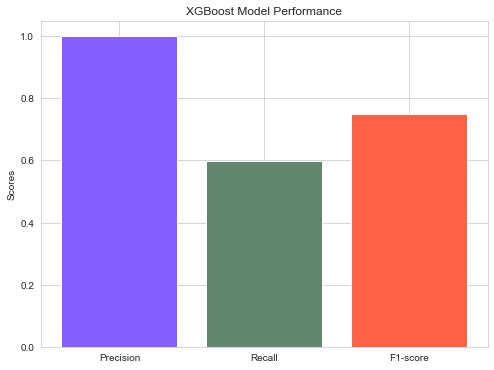

In [192]:
# Define the colors for the bars
colors = ['#865DFF', '#61876E', '#FE6244']  # Update colors here 

# Compute classification report
report = classification_report(Y_test, y_pred_xgb, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1_score]
x = np.arange(len(labels))

# Increase size of chart
plt.figure(figsize=(8, 6))

plt.bar(x, scores, color=colors)  # Update color parameter
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('XGBoost Model Performance')
plt.show()


# Evaluate the performance using ROC AUC score

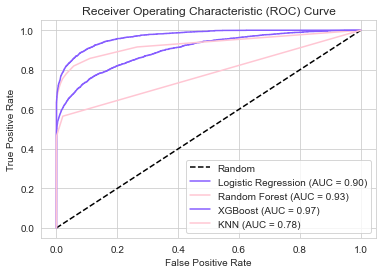

In [50]:
# Plot the AUC for each modelplt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {auc_lg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb1, tpr_xgb1, label=f'XGBoost (AUC = {auc_xgb1:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [41]:
# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_xgb).ravel()

In [42]:
# Calculate FAR, BCR, and MCC
far = fp / (fp + tn)
bcr = 1 - ((fp / (fp + tn)) + (fn / (fn + tp))) / 2
#mcc = ((tp * tn) - (fp * fn)) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)


print("FAR:", far)
print("BCR:", bcr)

FAR: 0.0
BCR: 0.7994604316546763


# Resolving Class Imbalance Using SMOTE

In [43]:
df_Smote=df.copy()
print("copy of dataset formed")

copy of dataset formed


In [44]:
# create a BinaryEncoder object
encoder = ce.BinaryEncoder(cols=['payment_type','employment_status','housing_status','device_os','source'])

# fit and transform the data using the encoder
df_Smote= encoder.fit_transform(df_Smote)

In [45]:
# Split the data into features and target
y = df_Smote.Fraud_Status
x = df_Smote.drop(["Fraud_Status"],axis = 1)
columns = x.columns.tolist()

In [46]:
# Split data into training and testing sets
X_train_Smote, X_test_Smote, y_train_Smote, y_test_Smote = train_test_split(x, y, test_size=0.3, random_state=42)


# Apply SMOTE to the training set

In [47]:
scaler = StandardScaler()
X_train_Smote = scaler.fit_transform(X_train_Smote)
X_test_Smote = scaler.transform(X_test_Smote)

In [48]:
# Instantiate SMOTE and oversample the minority class
sm = SMOTE(random_state=42)
X_train_Smote, y_train_Smote = sm.fit_resample(X_train_Smote, y_train_Smote)

# Logistic Regression Model After SMOTE

In [49]:
# Train a logistic regression model on the oversampled data
lg = LogisticRegression(solver='liblinear')

# Train the classifier
lg.fit(X_train_Smote, y_train_Smote)

# Make predictions on the testing set
y_pred_smote_lg = lg.predict(X_test_Smote)

y_pred_lg_smote1 = lg.predict_proba(X_test_Smote)[:, 1]
fpr_lg_smote, tpr_lg_smote, thresholds_lg_smote = roc_curve(y_test_Smote, y_pred_lg_smote1)
auc_lg_smote = roc_auc_score(y_test_Smote, y_pred_lg_smote1)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_Smote, y_pred_smote_lg))
print('Confusion Matrix:', confusion_matrix(y_test_Smote, y_pred_smote_lg))

Accuracy: 0.8659633333333333
Confusion Matrix: [[257098  39535]
 [   676   2691]]


In [50]:
print(classification_report(y_test_Smote, y_pred_smote_lg))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    296633
           1       0.06      0.80      0.12      3367

    accuracy                           0.87    300000
   macro avg       0.53      0.83      0.52    300000
weighted avg       0.99      0.87      0.92    300000



# Random forest classifier after SMOTE

In [51]:
# Create random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train_Smote, y_train_Smote)

# Make predictions on the testing set
y_pred_Smote_rf = rf.predict(X_test_Smote)

y_pred_Smote_rf1 = rf.predict_proba(X_test_Smote)[:, 1]
fpr_rf_smote, tpr_rf_smote, thresholds_rf = roc_curve(y_test_Smote, y_pred_Smote_rf1)
auc_rf_smote = roc_auc_score(y_test_Smote, y_pred_Smote_rf1) 

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_Smote, y_pred_Smote_rf))
print('Confusion Matrix:', confusion_matrix(y_test_Smote, y_pred_Smote_rf))

Accuracy: 0.9946066666666666
Confusion Matrix: [[296369    264]
 [  1354   2013]]


In [52]:
# Evaluate the performance of the model
print(classification_report(y_test_Smote, y_pred_Smote_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    296633
           1       0.88      0.60      0.71      3367

    accuracy                           0.99    300000
   macro avg       0.94      0.80      0.86    300000
weighted avg       0.99      0.99      0.99    300000



# Extreme Gradient Boosting After SMOTE

In [53]:
# Create gradient boosting classifier
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=100,random_state=42, max_depth=5, learning_rate=0.1, objective='binary:logistic')

# Train the gradient boosting classifier
xgb.fit(X_train_Smote, y_train_Smote)

# Make predictions on the testing set using the gradient boosting classifier
y_pred_xgb_Smote = xgb.predict(X_test_Smote)

y_pred_xgb_Smote1 = xgb.predict_proba(X_test_Smote)[:, 1]
fpr_xgb_smote, tpr_xgb_smote, thresholds_xgb_smote = roc_curve(y_test_Smote, y_pred_xgb_Smote1)
auc_xgb_smote = roc_auc_score(y_test_Smote, y_pred_xgb_Smote1) 


# Evaluate the models
print('Extreme Gradient Boosting Accuracy:', accuracy_score(y_test_Smote, y_pred_xgb_Smote))
print('Extreme Gradient Boosting Confusion Matrix:', confusion_matrix(y_test_Smote, y_pred_xgb_Smote))

Extreme Gradient Boosting Accuracy: 0.9907466666666667
Extreme Gradient Boosting Confusion Matrix: [[294974   1659]
 [  1117   2250]]


In [54]:
# Evaluate the performance of the model
print(classification_report(y_test_Smote, y_pred_xgb_Smote))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    296633
           1       0.58      0.67      0.62      3367

    accuracy                           0.99    300000
   macro avg       0.79      0.83      0.81    300000
weighted avg       0.99      0.99      0.99    300000



# KNeighborsClassifier After SMOTE

In [ ]:
# Create KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train_Smote, y_train_Smote)

# Make predictions on the testing set
y_pred_Smote_knn = knn.predict(X_test_Smote)

y_pred_Smote_knn1 = knn.predict_proba(X_test_Smote)[:, 1]
fpr_knn_smote, tpr__knn_smote, thresholds_knn_smote = roc_curve(y_test_Smote, y_pred_Smote_knn1)
auc_knn_smote = roc_auc_score(y_test_Smote, y_pred_Smote_knn1) 

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_Smote, y_pred_Smote_knn))
print('Confusion Matrix:', confusion_matrix(y_test_Smote, y_pred_Smote_knn))

In [103]:
# Evaluate the performance of the model
print(classification_report(y_test_Smote, y_pred_Smote_knn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    296633
           1       0.14      0.61      0.23      3367

    accuracy                           0.95    300000
   macro avg       0.57      0.78      0.60    300000
weighted avg       0.99      0.95      0.97    300000



# ROC AUC score Using SMOTE


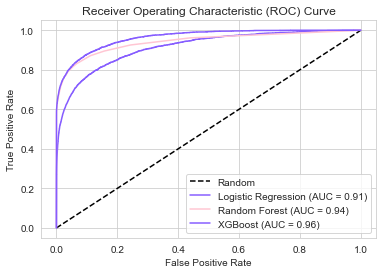

In [147]:
# Plot the AUC for each modelplt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr_lg_smote, tpr_lg_smote, label=f'Logistic Regression (AUC = {auc_lg_smote:.2f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest (AUC = {auc_rf_smote:.2f})')
plt.plot(fpr_xgb_smote, tpr_xgb_smote, label=f'XGBoost (AUC = {auc_xgb_smote:.2f})')
#plt.plot(fpr_knn_smote, tpr_knn_smote, label=f'KNN (AUC = {auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr_lg_smote, tpr_lg_smote, color='blue', label=f'Logistic Regression (AUC = {auc_lg_smote:.2f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, color='red', label=f'Random Forest (AUC = {auc_rf_smote:.2f})')
plt.plot(fpr_xgb_smote, tpr_xgb_smote, color='green', label=f'XGBoost (AUC = {auc_xgb_smote:.2f})')
#plt.plot(fpr_knn_smote, tpr_knn_smote, label=f'KNN (AUC = {auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


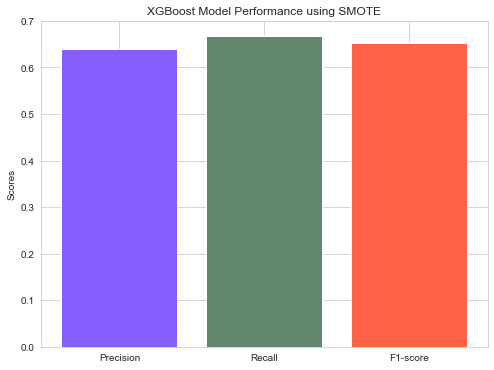

In [38]:
colors = ['#865DFF', '#61876E', '#FE6244']  # Update colors here ['#865DFF', '#FFC6D3']
# Calculate confusion matrix
# Compute classification report
report = classification_report(y_test_Smote, y_pred_xgb_Smote, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1_score]
x = np.arange(len(labels))

# Increase size of chart
plt.figure(figsize=(8, 6))

plt.bar(x, scores, color=colors)
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('XGBoost Model Performance using SMOTE')
plt.show()


In [71]:
# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_Smote, y_pred_xgb_Smote).ravel()

In [72]:
# Calculate FAR, BCR, and MCC
far = fp / (fp + tn)
bcr = 1 - ((fp / (fp + tn)) + (fn / (fn + tp))) / 2
#mcc = ((tp * tn) - (fp * fn)) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)


print("FAR:", far)
print("BCR:", bcr)


FAR: 0.005592769516540641
BCR: 0.8313289493670638
MCC: 0.6155668596815844


# Class Imbalance Using Under-Sampling

In [32]:
df_under=df.copy()
print("copy of dataset formed")

copy of dataset formed


In [33]:
# create a BinaryEncoder object
encoder = ce.BinaryEncoder(cols=['payment_type','employment_status','housing_status','device_os','source'])

# fit and transform the data using the encoder
df_under= encoder.fit_transform(df_under)

In [34]:
# Split the data into features and target
y = df_under.Fraud_Status
x = df_under.drop(["Fraud_Status"],axis = 1)
columns = x.columns.tolist()

In [35]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X_under, y_under = sampler.fit_resample(x, y)
#X_res, y_res = sampler.fit_resample(X, y)

In [36]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.20, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_under = scaler.fit_transform(X_train_under)
X_test_under = scaler.transform(X_test_under)

# Logistic Regression Using Under-Sampling

In [134]:
# Train a logistic regression model on the oversampled data
lg = LogisticRegression(solver='liblinear',C= 1, penalty= 'l1')

# Train the classifier
lg.fit(X_train_under, y_train_under)

# Make predictions on the testing set
y_pred_Ulg = lg.predict(X_test_under)

y_pred_lg_under1 = lg.predict_proba(X_test_under)[:, 1]
fpr_lg_under1, tpr_lg_under1, thresholds_lg_under = roc_curve(y_test_under, y_pred_lg_under1)
auc_lg_under1 = roc_auc_score(y_test_under, y_pred_lg_under1)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_under, y_pred_Ulg))
print('Confusion Matrix:', confusion_matrix(y_test_under, y_pred_Ulg))

Accuracy: 0.8372620126926564
Confusion Matrix: [[1939  293]
 [ 425 1755]]


In [135]:
# Evaluate the performance of the model
print(classification_report(y_test_under, y_pred_Ulg))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2232
           1       0.86      0.81      0.83      2180

    accuracy                           0.84      4412
   macro avg       0.84      0.84      0.84      4412
weighted avg       0.84      0.84      0.84      4412



# Random forest classifier after Under-sampling

In [128]:
# Create random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train_under, y_train_under)

# Make predictions on the testing set
y_pred_Urf = rf.predict(X_test_under)

y_pred_Urf1 = rf.predict_proba(X_test_under)[:, 1]
fpr_rf_under, tpr_rf_under, thresholds_rf_under = roc_curve(y_test_under, y_pred_Urf1)
auc_rf_under = roc_auc_score(y_test_under, y_pred_Urf1)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_under, y_pred_Urf))
print('Confusion Matrix:', confusion_matrix(y_test_under, y_pred_Urf))

Accuracy: 0.8882592928377153
Confusion Matrix: [[2081  151]
 [ 342 1838]]


In [91]:
# Evaluate the performance of the model
print(classification_report(y_test_under, y_pred_Urf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2232
           1       0.92      0.84      0.88      2180

    accuracy                           0.89      4412
   macro avg       0.89      0.89      0.89      4412
weighted avg       0.89      0.89      0.89      4412



# Gradient boosting classifier using Under-Sampling

In [38]:
# Create gradient boosting classifier
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=100,random_state=42, max_depth=5, learning_rate=0.1, objective='binary:logistic')
# Train the gradient boosting classifier
xgb.fit(X_train_under, y_train_under)

# Make predictions on the testing set using the gradient boosting classifier
y_pred_xgb_under = xgb.predict(X_test_under)

y_pred_xgb_under1 = xgb.predict_proba(X_test_under)[:, 1]
fpr_xgb_under, tpr_xgb_under, thresholds_xgb_under = roc_curve(y_test_under, y_pred_xgb_under1)
auc_xgb_under = roc_auc_score(y_test_under, y_pred_xgb_under1)

# Evaluate the models

print('Gradient Boosting Accuracy:', accuracy_score(y_test_under, y_pred_xgb_under))
print('Gradient Boosting Confusion Matrix:', confusion_matrix(y_test_under, y_pred_xgb_under))

Gradient Boosting Accuracy: 0.9023118766999093
Gradient Boosting Confusion Matrix: [[2072  160]
 [ 271 1909]]


In [39]:
# Evaluate the performance of the model
print(classification_report(y_test_under, y_pred_xgb_under))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2232
           1       0.92      0.88      0.90      2180

    accuracy                           0.90      4412
   macro avg       0.90      0.90      0.90      4412
weighted avg       0.90      0.90      0.90      4412



# KNeighborsClassifier

In [122]:
# Create KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train_under, y_train_under)

# Make predictions on the testing set
y_pred_knn_under = knn.predict(X_test_under)

y_pred_knn_under1 = knn.predict_proba(X_test_under)[:, 1]
fpr_knn_under1, tpr_knn_under1, thresholds_knn_under = roc_curve(y_test_under, y_pred_knn_under1)
auc_knn_under1 = roc_auc_score(y_test_under, y_pred_knn_under1)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_under, y_pred_knn_under))
print('Confusion Matrix:', confusion_matrix(y_test_under, y_pred_knn_under))

Accuracy: 0.8064369900271986
Confusion Matrix: [[1840  392]
 [ 462 1718]]


In [123]:
# Evaluate the performance of the model
print(classification_report(y_test_under, y_pred_knn_under))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2232
           1       0.81      0.79      0.80      2180

    accuracy                           0.81      4412
   macro avg       0.81      0.81      0.81      4412
weighted avg       0.81      0.81      0.81      4412



# ROC AUC score Using Under-Sampling

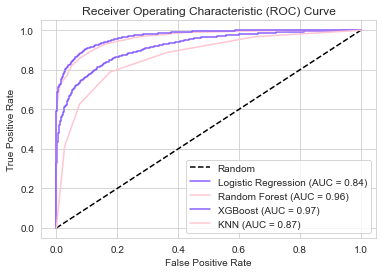

In [136]:
# Plot the AUC for each modelplt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr_lg_under1, tpr_lg_under1, label=f'Logistic Regression (AUC = {auc_lg_under:.2f})')
plt.plot(fpr_rf_under, tpr_rf_under, label=f'Random Forest (AUC = {auc_rf_under:.2f})')
plt.plot(fpr_xgb_under, tpr_xgb_under, label=f'XGBoost (AUC = {auc_xgb_under:.2f})')
plt.plot(fpr_knn_under1, tpr_knn_under1, label=f'KNN (AUC = {auc_knn_under1:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

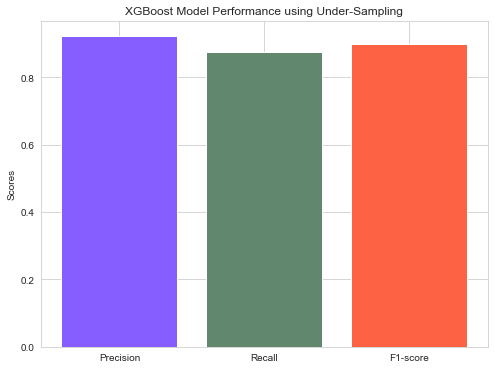

In [190]:
colors = ['#865DFF', '#61876E', '#FE6244']  # Update colors here ['#865DFF', '#FFC6D3']
# Calculate confusion matrix
# Compute classification report
report = classification_report(y_test_under, y_pred_gb_under, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1_score]
x = np.arange(len(labels))

# Increase size of chart
plt.figure(figsize=(8, 6))

plt.bar(x, scores, color=colors)
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('XGBoost Model Performance using Under-Sampling')
plt.show()

In [41]:
# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_under, y_pred_xgb_under).ravel()


In [42]:
# Calculate FAR, BCR, and MCC
far = fp / (fp + tn)
bcr = 1 - ((fp / (fp + tn)) + (fn / (fn + tp))) / 2

print("FAR:", far)
print("BCR:", bcr)

FAR: 0.07168458781362007
BCR: 0.9020017427904377


# Conclusion

The use of Extreme Gradient Boosting (XGBoost) classifier produced the best performing metrics with a precision of 92%, recall of 87%, F1-score of 90%, ROC-AUC of 97%, false alarm rate of 0.07, and Balanced Classification Rate (BCR) of 90%. The application of under-sampling method to fix class imbalance further improved the model's performance.